In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


* feature별 산점도와 선형회귀선

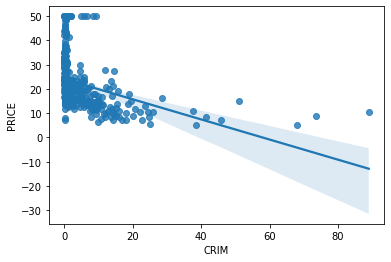

In [5]:
sns.regplot(x='CRIM',y='PRICE',data=df)

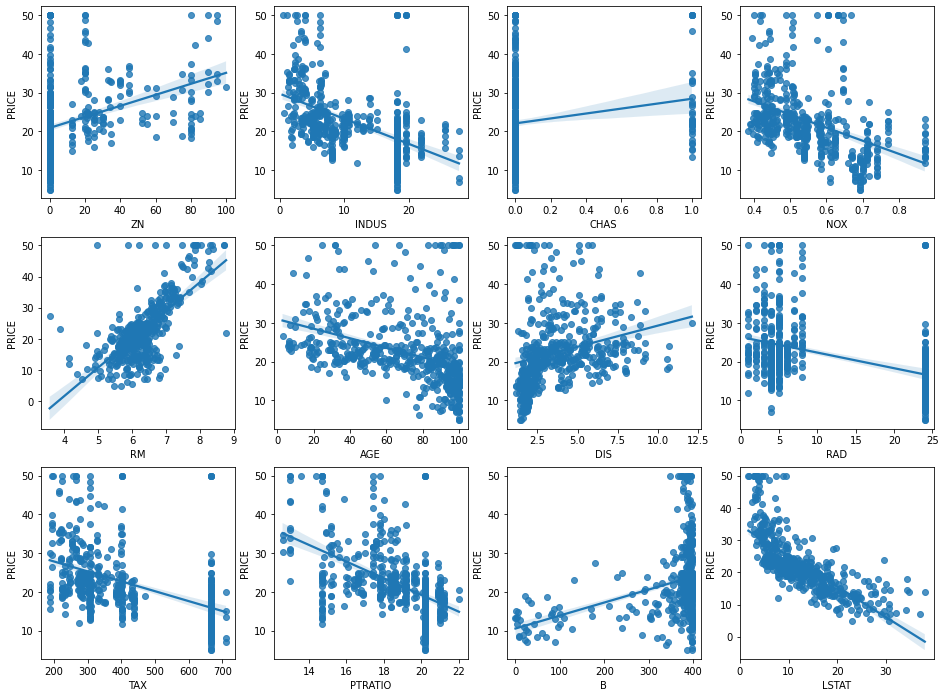

In [7]:
_, axs=plt.subplots(3,4,figsize=(16,12))
for i,feature in enumerate(df.columns[1:-1]):
  row,col = i//4, i%4
  sns.regplot(x=feature,y='PRICE',data=df,ax=axs[row][col])

* feature별 결정계수(R2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
for feature in df.columns[:-1]:
  lr = LinearRegression()
  X = df[feature].values.reshape((-1,1))
  lr.fit(X,boston.target)
  score = lr.score(X,boston.target)
  print(f'{feature} : \t {score:.4f}')

CRIM : 	 0.1508
ZN : 	 0.1299
INDUS : 	 0.2340
CHAS : 	 0.0307
NOX : 	 0.1826
RM : 	 0.4835
AGE : 	 0.1421
DIS : 	 0.0625
RAD : 	 0.1456
TAX : 	 0.2195
PTRATIO : 	 0.2578
B : 	 0.1112
LSTAT : 	 0.5441


* 다중 선형 회귀

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.2,random_state=2022)

In [11]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
#R-squared
lr.score(X_test,y_test)

0.6225687597000796

In [13]:
#계수, weight
lr.coef_

array([-1.09358524e-01,  4.17604608e-02,  4.92275845e-02,  2.75483861e+00,
       -1.37425402e+01,  4.71242684e+00, -1.19656681e-02, -1.43522444e+00,
        2.98673854e-01, -1.23637115e-02, -8.95540107e-01,  1.03495304e-02,
       -5.21139480e-01])

y=-1.09 * CRIM +4.127 * ZN+.....-5.21*LSTAT

In [14]:
#절편 bias
lr.intercept_

27.615023209546692

회귀는 선형회귀만 가능한가?

In [ ]:
#LinearRegression, 결정트리, SVM, RandomForest, XGBoost

In [15]:
from sklearn.metrics import r2_score,mean_squared_error

1. 선형회귀

In [16]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)

2. 결정트리

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtr = DecisionTreeRegressor(random_state=2022)
dtr.fit(X_train,y_train)
pred_dt = dtr.predict(X_test)
r2_dt = r2_score(y_test,pred_dt)
mse_dt = mean_squared_error(y_test,pred_dt)

* SVM

In [21]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test,pred_sv)
mse_sv = mean_squared_error(y_test,pred_sv)

* RandomForest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test,pred_rf)
mse_rf = mean_squared_error(y_test,pred_rf)

* XGBoost

In [23]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train,y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test,pred_xg)
mse_xg = mean_squared_error(y_test,pred_xg)

[02:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


* 비교

In [24]:
print('LR\tDT\tSVM\tRF\tXG')
print(f'{r2_lr:.4f}\t{r2_dt:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')
print(f'{mse_lr:.4f}\t{mse_dt:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

LR	DT	SVM	RF	XG
0.6226	0.7353	0.3081	0.8010	0.7760
26.9845	18.9238	49.4676	14.2265	16.0126


In [25]:
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'DT':pred_dt, 'SVM':pred_sv, 'RF':pred_rf, 'XG':pred_xg
})
df.head()

,y_test,LR,DT,SVM,RF,XG
0,20.1,21.052395,20.4,20.794067,20.220,20.573149
1,11.9,6.309071,13.8,16.708575,13.105,17.613409
2,20.6,21.526247,23.0,17.683103,21.212,21.409130
3,33.2,36.158114,34.6,24.157037,34.779,33.476273
4,20.8,18.031103,23.1,15.959578,20.292,18.880611
